In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import pprint

### Reading the dataset

In [2]:
train_data = pd.read_csv(r'D:\Devi\TCS\MobileDataSets\MobileDataSets\MobileTrain.csv')
dataset = train_data.copy(deep=True)

In [4]:
pd.set_option('display.max_columns',None)
train_data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
pd.set_option('display.max_columns',None)
train_data.tail()



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


Data loaded successfully.

### EDA

In [ ]:
# Checking the basic details pf the dataset

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
train_data.shape

(2000, 21)

In [8]:
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
train_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

#### Visualisation

In [10]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

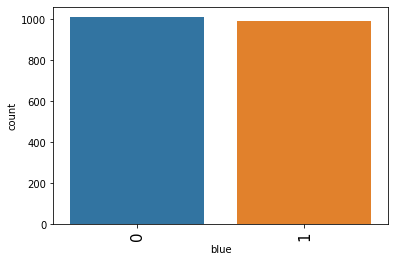

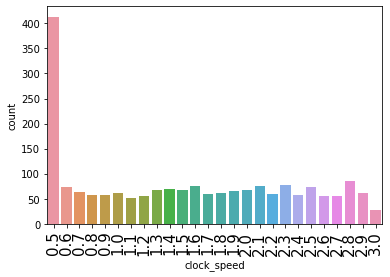

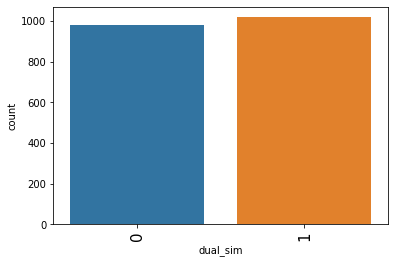

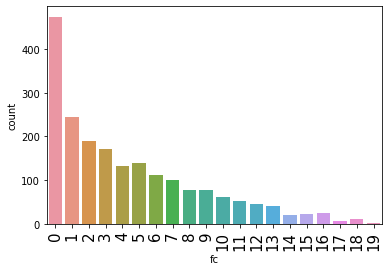

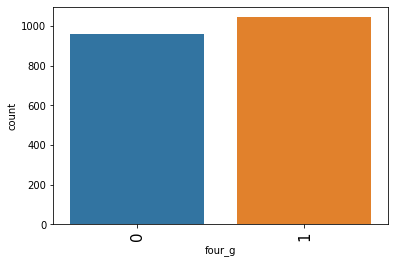

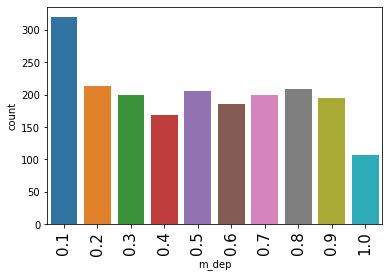

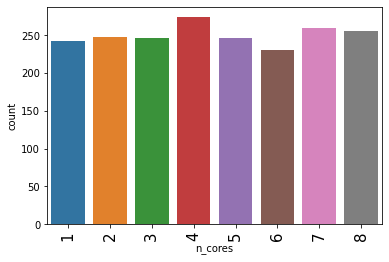

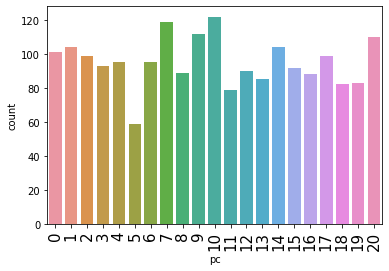

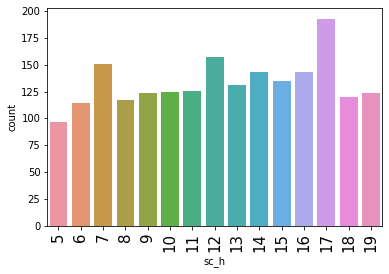

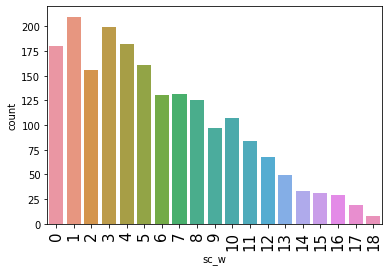

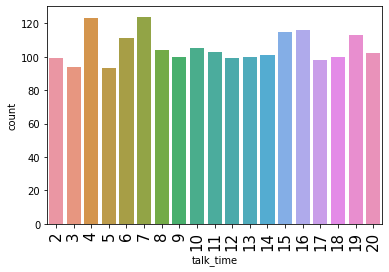

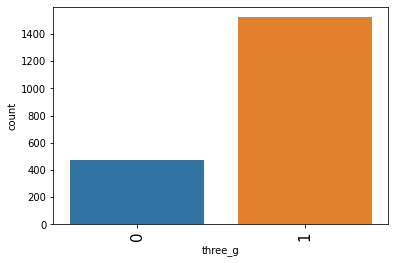

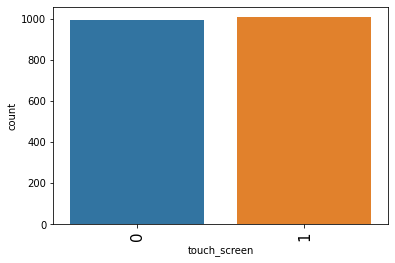

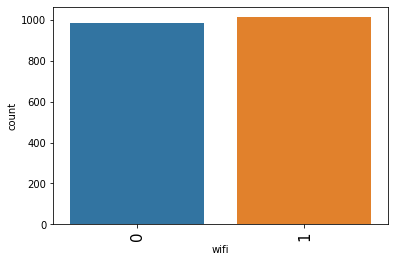

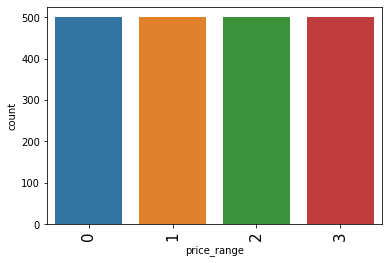

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [12]:
# count plot on various features
for i in train_data:
    if(train_data[i].nunique()<30):
        sns.countplot(x=train_data[i])
        plt.xticks(fontsize=15,rotation=90)
    plt.show()
plt.tight_layout


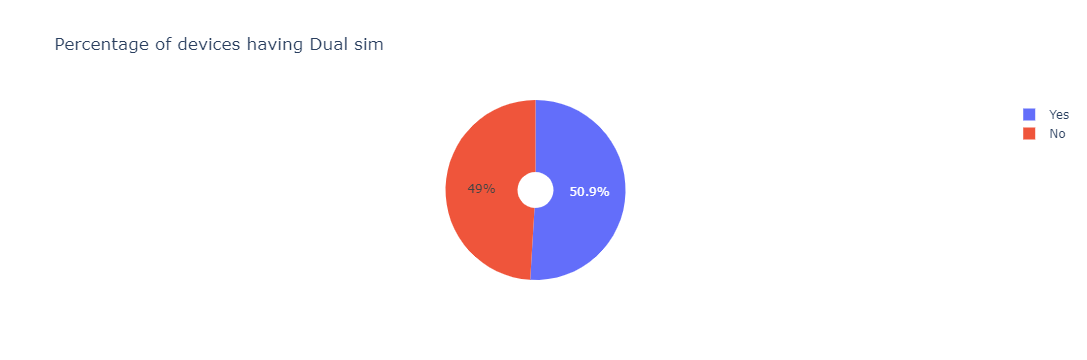

In [14]:
# Pie chart

train_data['isDualSim'] = ''
for i in range(len(train_data)):
    if train_data['dual_sim'][i] == 0:
        train_data['isDualSim'][i] = 'No'
    else:
         train_data['isDualSim'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isDualSim',title='Percentage of devices having Dual sim', hole = 0.2)

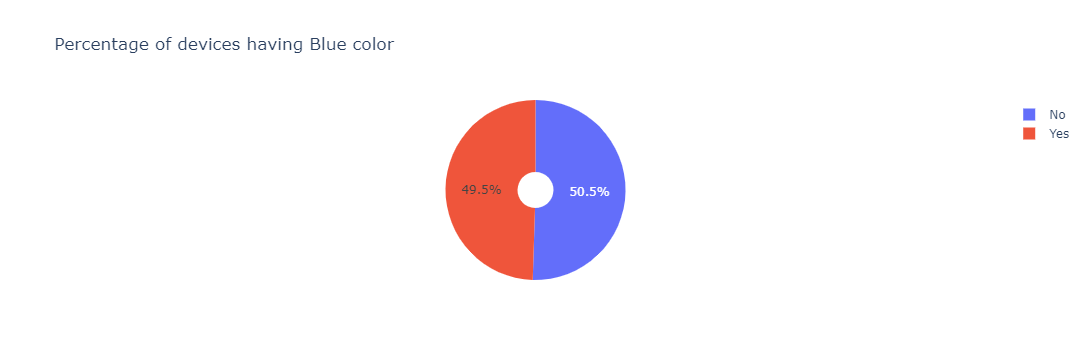

In [15]:
train_data['isBlue'] = ''
for i in range(len(train_data)):
    if train_data['blue'][i] == 0:
        train_data['isBlue'][i] = 'No'
    else:
         train_data['isBlue'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isBlue',title='Percentage of devices having Blue color', hole = 0.2)

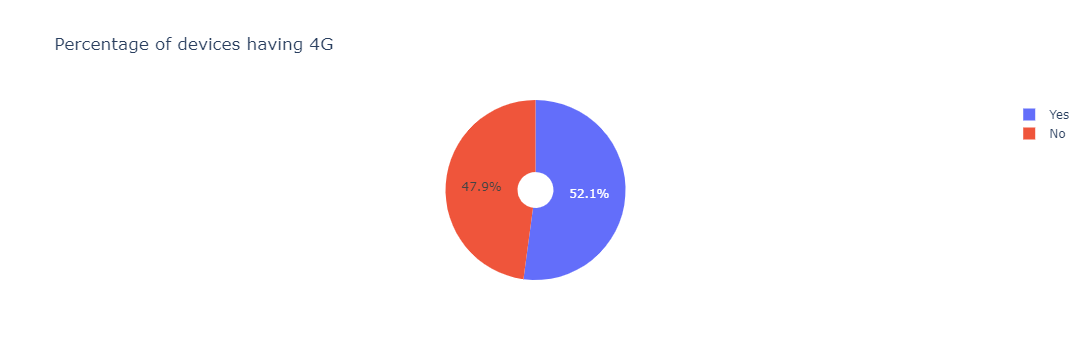

In [16]:
train_data['isFour_G'] = ''
for i in range(len(train_data)):
    if train_data['four_g'][i] == 0:
        train_data['isFour_G'][i] = 'No'
    else:
         train_data['isFour_G'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isFour_G',title='Percentage of devices having 4G', hole = 0.2)

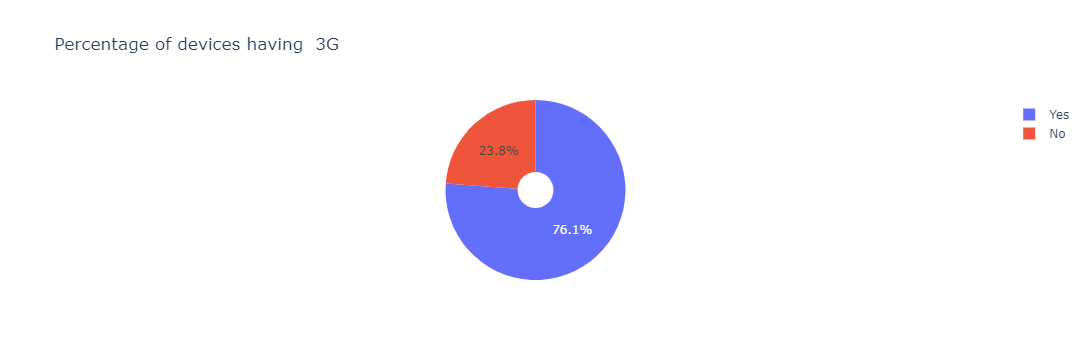

In [17]:
train_data['isThree_G'] = ''
for i in range(len(train_data)):
    if train_data['three_g'][i] == 0:
        train_data['isThree_G'][i] = 'No'
    else:
         train_data['isThree_G'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isThree_G',title='Percentage of devices having  3G', hole = 0.2)

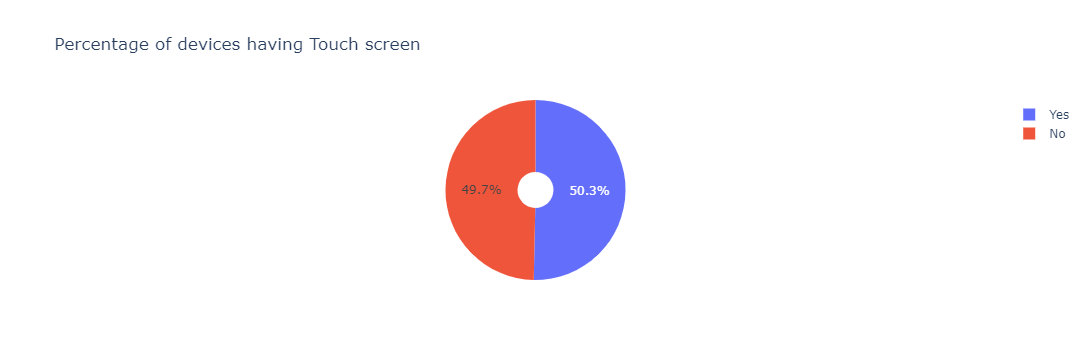

In [18]:
train_data['isTouch'] = ''
for i in range(len(train_data)):
    if train_data['touch_screen'][i] == 0:
        train_data['isTouch'][i] = 'No'
    else:
         train_data['isTouch'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isTouch',title='Percentage of devices having Touch screen', hole = 0.2)

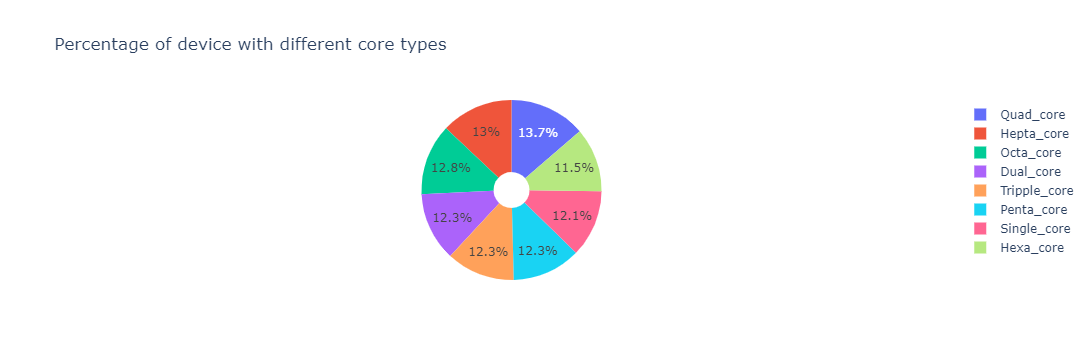

In [19]:
train_data['cores'] = ''
for i in range(len(train_data)):
    if train_data['n_cores'][i] == 1:
        train_data['cores'][i] = 'Single_core'
    elif train_data['n_cores'][i] == 2:
         train_data['cores'][i] = 'Dual_core'
    elif train_data['n_cores'][i] == 3:
         train_data['cores'][i] = 'Tripple_core'
    elif train_data['n_cores'][i] == 4:
         train_data['cores'][i] = 'Quad_core'
    elif train_data['n_cores'][i] == 5:
         train_data['cores'][i] = 'Penta_core'
    elif train_data['n_cores'][i] == 6:
         train_data['cores'][i] = 'Hexa_core' 
    elif train_data['n_cores'][i] == 7:
         train_data['cores'][i] = 'Hepta_core'
    else:
         train_data['cores'][i] = 'Octa_core'
px.pie(data_frame=train_data,names = 'cores',title='Percentage of device with different core types', hole = 0.2)

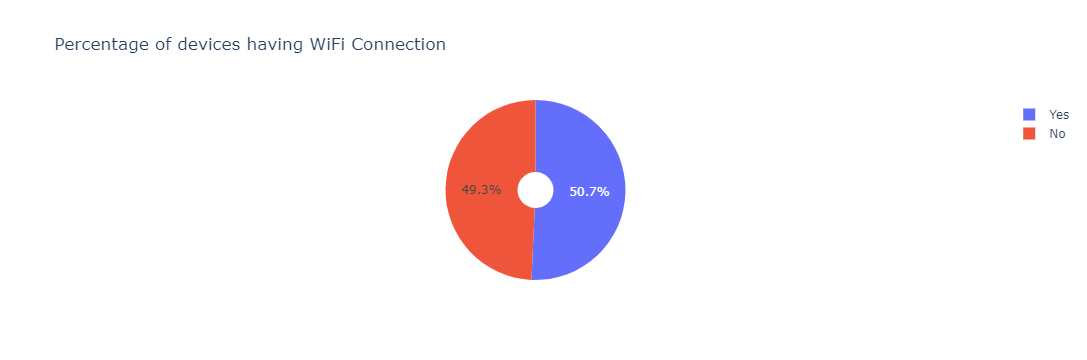

In [20]:
train_data['isWifi'] = ''
for i in range(len(train_data)):
    if train_data['wifi'][i] == 0:
        train_data['isWifi'][i] = 'No'
    else:
         train_data['isWifi'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isWifi',title='Percentage of devices having WiFi Connection', hole = 0.2)

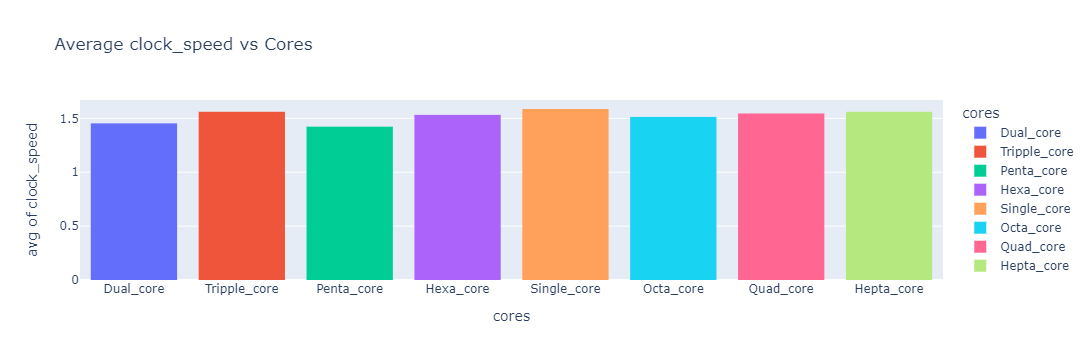

In [21]:
# px.histogram(train_data,x='clock_speed',color='n_cores',title="Clockspeed vs Processor")


fig = px.histogram(train_data, x="cores", y="clock_speed", histfunc='avg',color='cores',title="Average clock_speed vs Cores")
fig.show()

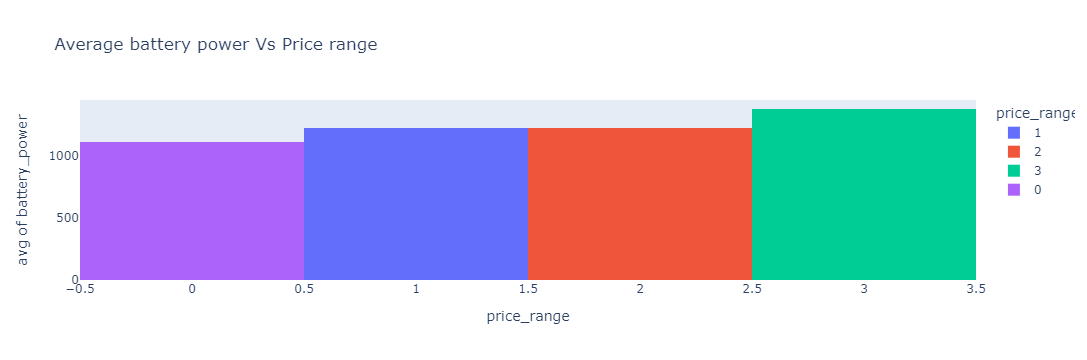

In [22]:

fig = px.histogram(train_data, x="price_range", y="battery_power", histfunc='avg',title="Average battery power Vs Price range",color="price_range")
fig.show()

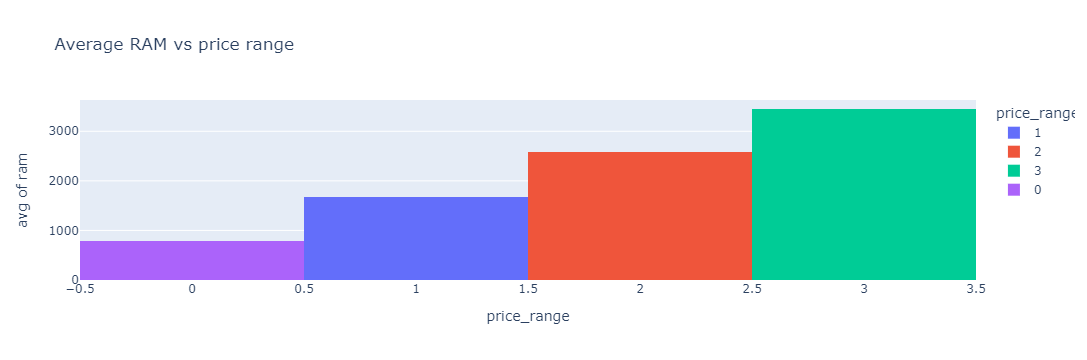

In [23]:
fig = px.histogram(train_data, x="price_range", y="ram", histfunc='avg',title="Average RAM vs price range",color="price_range")
fig.show()

From all these graphs we can conclude that almost 50% of the smartphones having wiFi connection,3G/4G connection, Touch screen and dual sim feature. these are the most basic features of a smart phone now a days. For a good smart phone there should be an average clock speed of 1.5Gz minimum. As battery power and RAM increases the price range also increases.  

Text(0.5, 1.0, 'Mobile size Vs Price range')

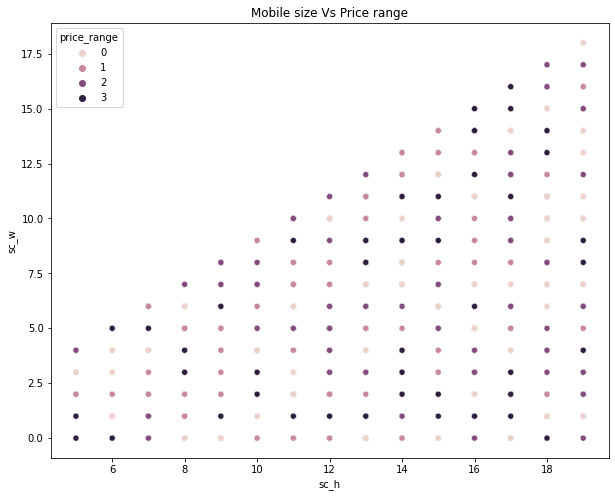

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_data['sc_h'],train_data['sc_w'],hue=train_data['price_range'])
plt.title("Mobile size Vs Price range")

Text(0.5, 1.0, 'Pixel size Vs Price range')

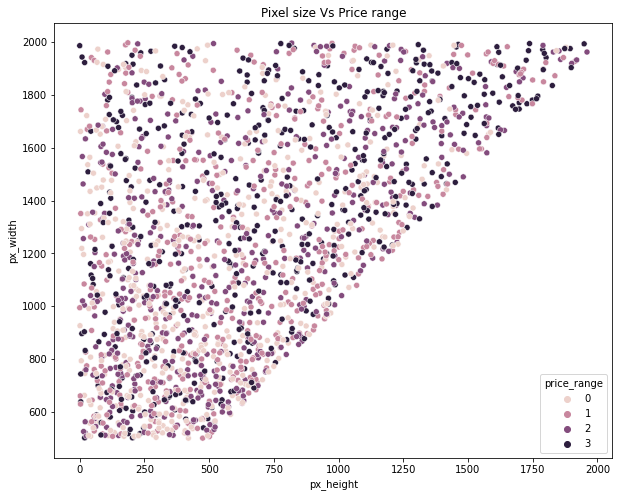

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_data['px_height'],train_data['px_width'],hue = train_data['price_range'])
plt.title("Pixel size Vs Price range")

For a smart phone, the pixel size refers to the screen resolution. According to our data the pixel size is not affecting the price range. The price range is mixed up for all the dimensions. 
The size of the phone as well, not that much correlated with the price range.

Text(0.5, 1.0, 'clockSpeed Vs Price range')

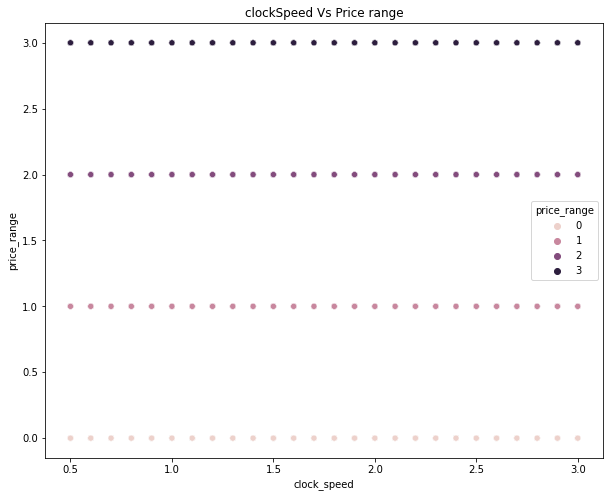

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_data['clock_speed'],train_data['price_range'],hue = train_data['price_range'])
plt.title("clockSpeed Vs Price range")

The clock speed determines how many instructions the processor can execute per second.The clock speed of the phone dirdctly affects the price range, as clock speed increases the price range also increases.

<AxesSubplot:>

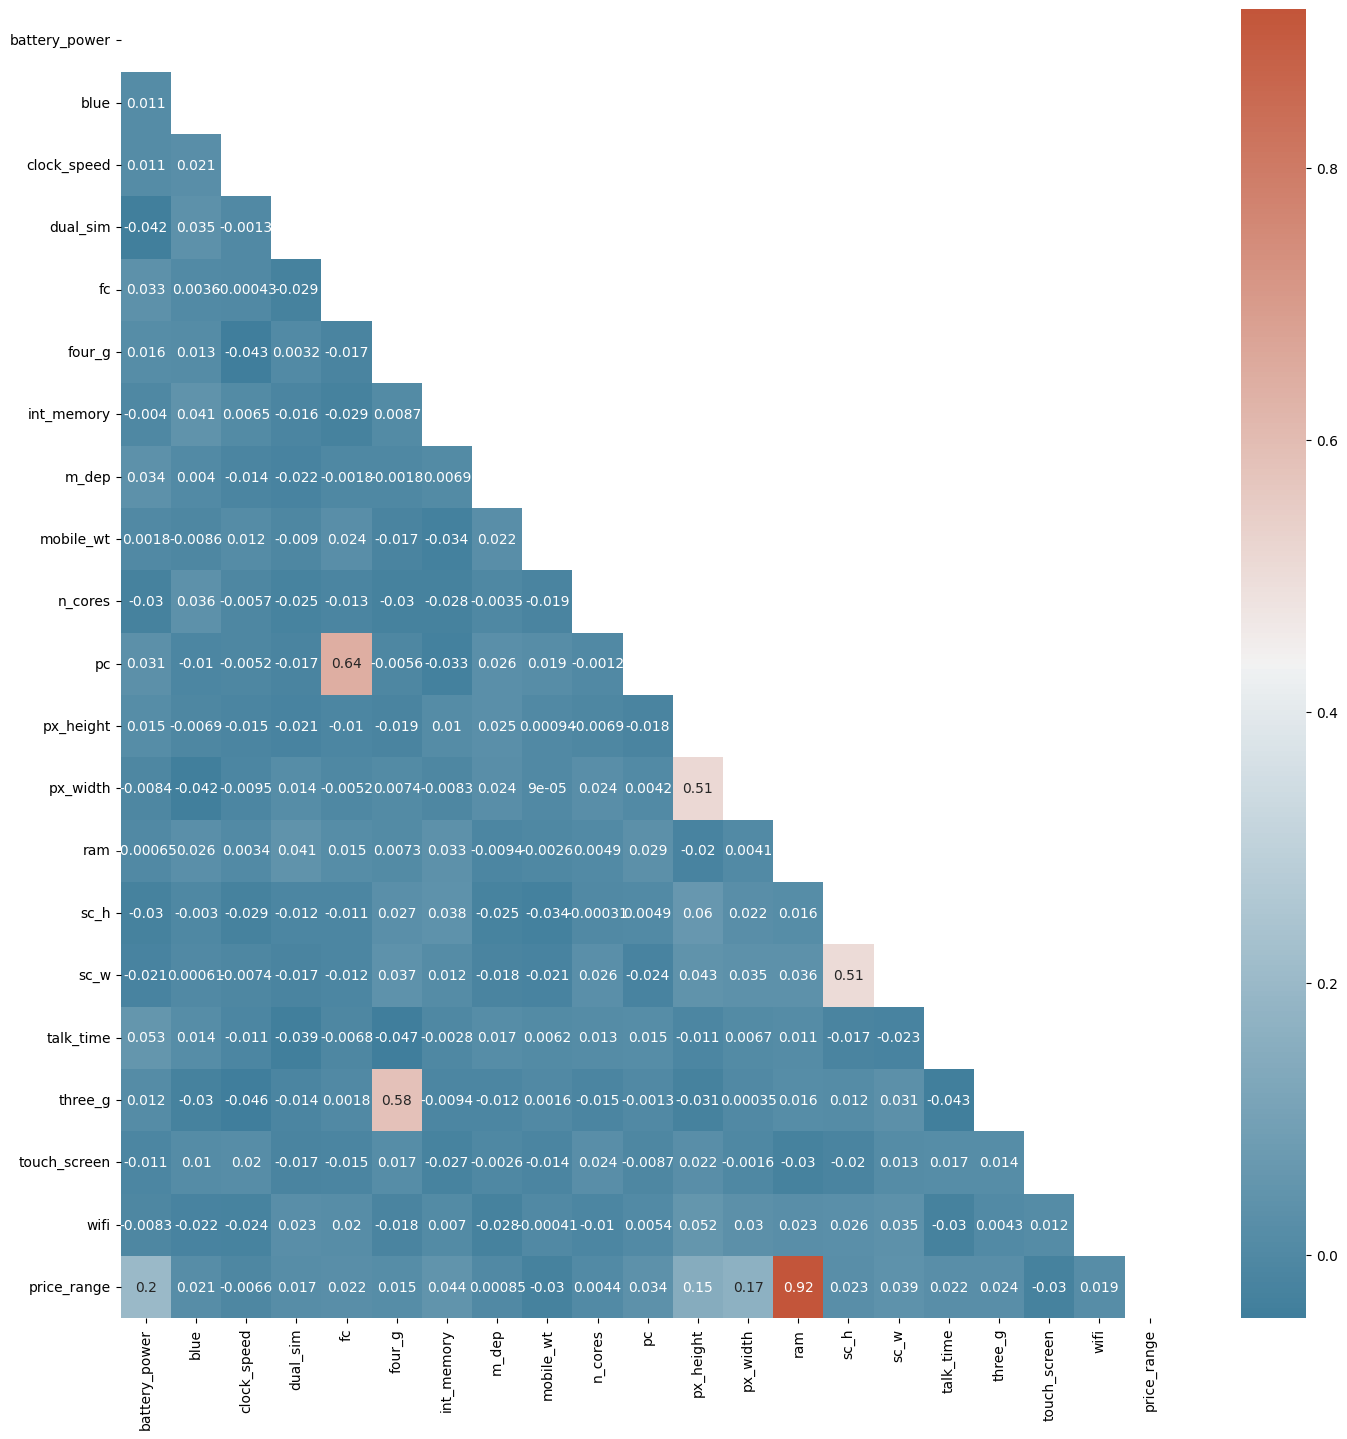

In [25]:
# correlation between different variables
corr = dataset.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(17, 17))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True,mask=mask,cmap=cmap)

The graph shows the correlation between the features. From the graph it is clear that the RAM and price range are highly correlated to each other

### PreProcessing



<AxesSubplot:>

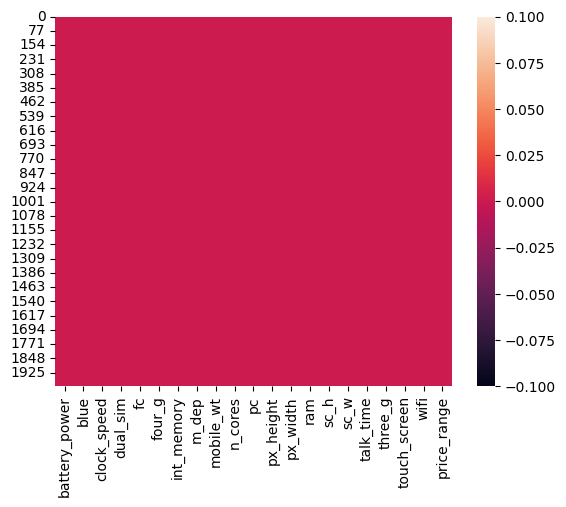

In [26]:
# Checking for null values in the dataset.

sns.heatmap(dataset.isna())

There is no null values in the dataset.

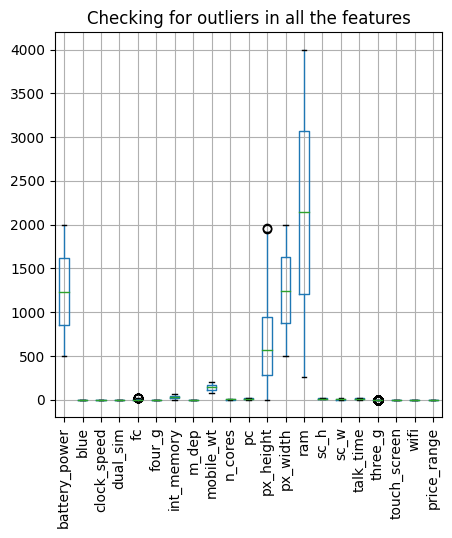

In [21]:
# Checking for outliers in the dataset

freqgraph = dataset.select_dtypes(include=['int64','float64'])
freqgraph.boxplot(figsize=(5,5))
plt.title("Checking for outliers in all the features")
plt.xticks(rotation=90)
plt.show()

There is no such outliers in the dataset.The dataset is almost clean and there is no null values as well.

### Ranking the features

In [5]:
dataset.rank(axis=1,ascending=False)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,2.0,19.0,10.0,19.0,14.0,19.0,8.5,16.0,4.0,11.5,11.5,5.0,3.0,1.0,7.0,8.5,6.0,19.0,19.0,14.0,14.0
1,3.0,15.0,19.0,15.0,20.5,15.0,6.0,18.0,5.0,10.5,9.0,4.0,2.0,1.0,7.0,10.5,8.0,15.0,15.0,20.5,12.0
2,4.0,16.0,20.0,16.0,12.0,16.0,6.0,19.0,5.0,10.0,9.0,3.0,2.0,1.0,7.0,12.0,8.0,16.0,16.0,21.0,12.0
3,4.0,14.5,12.0,19.0,19.0,19.0,8.0,16.0,5.0,11.0,9.0,3.0,2.0,1.0,6.0,10.0,7.0,14.5,19.0,19.0,13.0
4,1.0,16.0,13.0,20.5,9.0,16.0,6.0,19.0,5.0,11.5,8.0,4.0,3.0,2.0,10.0,11.5,7.0,16.0,16.0,20.5,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3.0,14.0,18.0,14.0,20.0,14.0,11.0,17.0,5.0,9.0,7.0,2.0,1.0,4.0,8.0,10.0,6.0,14.0,14.0,20.0,20.0
1996,2.5,16.0,12.0,16.0,20.5,20.5,6.0,19.0,5.0,10.0,11.0,4.0,2.5,1.0,8.0,9.0,7.0,16.0,16.0,16.0,13.0
1997,2.0,20.5,18.0,14.5,14.5,14.5,6.0,19.0,5.0,8.0,10.5,4.0,3.0,1.0,7.0,14.5,9.0,14.5,14.5,20.5,10.5
1998,1.0,20.0,17.0,20.0,12.0,14.5,6.0,18.0,5.0,10.5,10.5,4.0,3.0,2.0,8.0,9.0,7.0,14.5,14.5,14.5,20.0


rank() method returns a rank of every respective index of a series passed. The rank is returned on the basis of position after sorting

In [6]:
# Ranking all the features using rank()

dataset['Rank_by_price'] = dataset['price_range'].rank()
dataset['rank_by_battery_power'] = dataset['battery_power'].rank(ascending=False)
dataset['rank_by_bluetooth'] = dataset['blue'].rank(ascending=False)
dataset['rank_by_clock_speed'] = dataset['clock_speed'].rank(ascending=False)
dataset['rank_by_dual_sim'] = dataset['dual_sim'].rank(ascending=False)
dataset['rank_by_fc'] = dataset['fc'].rank(ascending=False)
dataset['rank_by_4G'] = dataset['four_g'].rank(ascending=False)
dataset['rank_by_int_memory'] = dataset['int_memory'].rank(ascending=False)
dataset['rank_by_mdep'] = dataset['m_dep'].rank(ascending=False)
dataset['rank_by_mobile_wt'] = dataset['mobile_wt'].rank(ascending=False)
dataset['rank_by_no_of_cores'] = dataset['n_cores'].rank(ascending=False)
dataset['rank_by_primary_camera'] = dataset['pc'].rank(ascending=False)
dataset['rank_by_px_height'] = dataset['px_height'].rank(ascending=False)
dataset['rank_by_px_width'] = dataset['px_width'].rank(ascending=False)
dataset['rank_by_RAM'] = dataset['ram'].rank(ascending=False)
dataset['rank_by_screen_height'] = dataset['sc_h'].rank(ascending=False)
dataset['rank_by_screen_width'] = dataset['sc_w'].rank(ascending=False)
dataset['rank_by_talk_time'] = dataset['talk_time'].rank(ascending=False)
dataset['rank_by_3G'] = dataset['three_g'].rank(ascending=False)
dataset['rank_by_touch_screen'] = dataset['touch_screen'].rank(ascending=False)
dataset['rank_by_WiFi'] = dataset['wifi'].rank(ascending=False)

In [9]:
dataset.sort_values("Rank_by_price",inplace=True)

In [10]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Rank_by_price,rank_by_battery_power,rank_by_bluetooth,rank_by_clock_speed,rank_by_dual_sim,rank_by_fc,rank_by_4G,rank_by_int_memory,rank_by_mdep,rank_by_mobile_wt,rank_by_no_of_cores,rank_by_primary_camera,rank_by_px_height,rank_by_px_width,rank_by_RAM,rank_by_screen_height,rank_by_screen_width,rank_by_talk_time,rank_by_3G,rank_by_touch_screen,rank_by_WiFi
1838,720,1,0.9,1,12,1,14,0.8,165,4,14,366,1234,1086,14,7,3,1,1,0,0,250.5,1680.5,495.5,1362.5,510.0,148.0,522.0,1569.0,405.5,586.5,1128.5,606.5,1343.5,1023.0,1555.5,787.0,716.5,1854.5,762.0,503.5,1507.5
1016,551,1,2.8,0,0,1,54,0.1,172,7,15,169,1916,1414,6,1,19,1,0,1,0,250.5,1927.0,495.5,133.0,1510.0,1763.5,522.0,304.5,1840.5,476.5,386.0,508.5,1719.0,124.5,1370.5,1846.5,1715.5,159.0,762.0,1503.5,507.5
1533,642,1,0.5,0,0,1,38,0.8,86,5,10,887,1775,435,9,2,2,1,1,0,0,250.5,1789.5,495.5,1794.0,1510.0,1763.5,522.0,811.0,405.5,1893.0,868.5,973.5,563.0,303.0,1908.5,1459.5,1532.5,1951.0,762.0,503.5,1507.5
1014,1633,0,1.7,1,3,1,33,0.9,111,2,19,146,906,511,9,0,7,1,1,0,0,250.5,480.0,1495.5,854.5,510.0,1007.5,522.0,956.5,204.0,1467.0,1635.0,152.0,1769.5,1448.5,1859.0,1459.5,1910.5,1418.5,762.0,503.5,1507.5
1946,590,1,1.2,1,0,0,32,0.4,141,6,1,227,509,1817,10,0,6,0,1,0,0,250.5,1870.0,495.5,1193.5,510.0,1763.5,1522.0,990.0,1184.5,995.0,630.5,1847.5,1598.0,1988.5,1167.5,1335.0,1910.5,1536.0,1762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,658,1,2.7,0,0,1,12,0.9,103,7,3,1156,1750,3587,14,11,20,1,0,0,3,1750.5,1771.0,495.5,203.0,1510.0,1763.5,522.0,1640.5,204.0,1609.0,386.0,1650.0,306.0,334.0,230.5,787.0,279.5,51.5,762.0,1503.5,1507.5
678,1793,0,1.8,1,10,0,12,0.5,169,6,17,1086,1418,3533,16,14,15,1,1,1,3,1750.5,277.0,1495.5,793.5,510.0,252.5,1522.0,1640.5,998.0,524.5,630.5,325.0,369.5,768.5,260.0,509.0,104.0,587.0,762.0,503.5,507.5
676,1027,0,0.5,0,2,1,64,0.9,103,2,7,1698,1747,3786,17,12,12,1,0,0,3,1750.5,1274.0,1495.5,1794.0,1510.0,1187.0,522.0,16.0,204.0,1609.0,1635.0,1295.0,41.0,336.5,117.0,341.0,203.5,895.0,762.0,1503.5,1507.5
718,1108,0,1.0,0,3,0,49,0.7,140,5,12,1298,1666,3254,12,0,16,1,0,0,3,1750.5,1163.0,1495.5,1303.0,1510.0,1007.5,1522.0,465.5,609.5,1009.0,868.5,788.5,193.0,447.5,404.0,1068.0,1910.5,471.5,762.0,1503.5,1507.5


# Extra tree classiffier

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

In [3]:
X = train_data.iloc[:,0:20]  
y = train_data.iloc[:,-1]  

In [6]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [39]:
y.nunique()

4

[0.06258119 0.02058846 0.03202031 0.0194577  0.03240306 0.01647893
 0.03503583 0.03386818 0.03646578 0.03297386 0.0334791  0.047375
 0.04845446 0.39533965 0.03361099 0.0336617  0.03293206 0.0143861
 0.01908885 0.01979882]


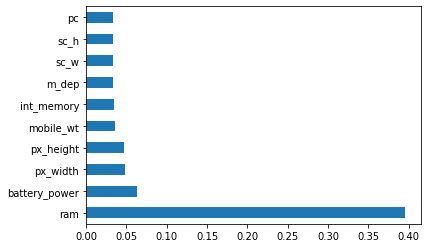

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

extraTree_classifier = ExtraTreesClassifier()
extraTree_classifier.fit(X,y)
print(extraTree_classifier.feature_importances_)
feat_importances = pd.Series(extraTree_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

These are the top 10 important features from the dataset. Among them RAM is the most important feature followed by Battery power, pixel width and height.

### Scaling

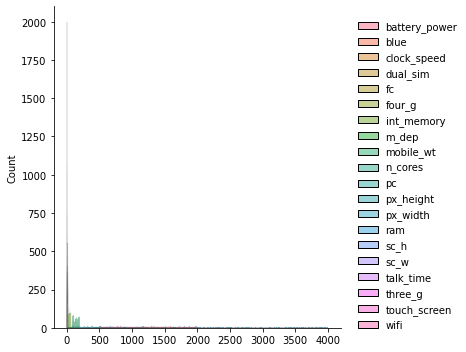

In [4]:
# standard scaling the data


from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X)
sns.displot(X)

In [5]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.2,random_state=45)

## Modelling

Here, im trying to predict the best smartphones according the price range.
<br>
price_range: This is the target variable with a value of 0--low cost, 1--medium cost, 2--high cost and 3--very high cost.

### 1.Logistic regression

In [7]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,classification_report


In [44]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression(max_iter=5000)
log.fit(X_train,Y_train)
print("score {}".format(log.score(X_train,Y_train)*100))
pred_log=log.predict(X_test)
print(pred_log)
acrr=accuracy_score(Y_test,pred_log)*100
print("Accuracy Score {}%".format(acrr))
print("Confusion matrix {}".format(confusion_matrix(Y_test,pred_log)))
print("{}".format(classification_report(Y_test,pred_log)))

score 75.25
[3 0 1 0 2 0 1 3 0 1 1 0 0 1 1 3 1 1 3 0 3 1 2 3 3 1 2 1 2 1 3 0 1 3 1 3 0
 2 2 1 0 3 1 0 2 0 1 0 3 0 0 3 3 0 3 3 1 1 1 2 0 0 0 1 0 0 1 1 0 1 1 1 0 1
 1 3 1 1 1 1 0 1 1 1 0 0 2 1 0 1 2 1 1 2 1 0 3 3 0 3 3 1 3 0 3 3 2 1 0 3 1
 2 0 2 1 2 0 0 1 0 1 3 0 3 0 0 3 3 1 3 1 3 0 1 0 1 2 0 0 2 0 3 1 3 1 0 3 3
 0 1 2 0 3 0 2 1 1 3 2 0 0 3 2 1 0 2 2 3 3 0 3 3 1 1 0 3 1 2 1 2 3 3 1 3 1
 3 2 2 1 0 3 2 2 3 3 3 2 2 0 3 2 3 3 1 0 0 2 3 3 0 2 3 0 1 1 1 0 3 2 0 0 0
 2 3 3 1 0 2 0 3 1 1 1 0 0 3 3 3 1 0 2 2 3 0 0 2 1 2 1 0 0 0 2 3 0 0 0 2 3
 2 1 2 0 0 2 3 1 2 0 3 1 0 0 2 2 3 1 3 3 2 0 1 1 2 3 2 2 2 0 1 2 0 3 3 1 1
 3 2 3 1 3 3 3 1 1 3 3 0 0 0 2 0 2 2 2 1 1 0 0 0 0 2 2 2 3 0 0 2 2 1 2 0 2
 2 1 2 1 3 3 2 3 3 3 1 0 1 2 0 2 0 2 3 0 3 3 1 0 2 1 2 3 1 1 3 1 3 2 0 2 1
 3 2 0 1 2 2 3 1 2 1 1 2 0 2 0 1 2 2 2 0 0 1 3 0 2 2 2 2 1 3]
Accuracy Score 72.25%
Confusion matrix [[94 10  0  0]
 [12 73 27  2]
 [ 0 23 54 28]
 [ 0  0  9 68]]
              precision    recall  f1-score   support

           0       0.

### 2.Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dec=DecisionTreeClassifier()
dec.fit(X_train,Y_train)
print("score {}".format(dec.score(X_train,Y_train)*100))
pred_dec=dec.predict(X_test)
print(pred_dec)
acr_DT=accuracy_score(Y_test,pred_dec)*100
print("Accuracy Score {}%".format(acr_DT))
print("Confusion matrix {}".format(confusion_matrix(Y_test,pred_dec)))
print("{}".format(classification_report(Y_test,pred_dec)))

score 100.0
[3 0 2 0 3 0 2 3 0 1 0 0 0 1 1 3 1 1 3 0 2 1 1 3 3 0 2 1 2 1 3 0 1 3 0 3 0
 1 3 1 0 2 2 0 2 0 1 1 3 1 0 3 3 1 3 3 1 1 1 1 0 0 0 1 0 0 1 1 0 2 2 1 0 1
 1 2 1 1 1 1 0 2 1 1 0 0 1 1 0 1 2 1 1 1 1 0 3 3 0 3 3 1 3 0 3 3 1 1 0 3 2
 2 1 2 1 3 0 0 0 0 2 3 0 3 1 0 3 3 1 3 1 3 0 1 0 1 3 0 0 2 0 2 0 2 2 0 1 3
 0 0 3 0 3 0 2 0 0 3 2 0 0 3 1 1 1 2 2 3 2 0 3 3 1 2 0 3 2 2 0 2 2 3 0 2 2
 3 2 3 2 0 3 1 2 3 3 3 2 2 0 1 2 2 3 0 0 0 2 3 2 0 1 3 0 2 1 0 0 3 2 0 0 0
 2 2 3 1 0 2 0 3 1 1 2 0 1 3 3 2 1 0 1 1 3 0 1 2 1 1 2 0 0 0 1 3 0 0 0 1 3
 1 1 2 1 1 2 2 1 2 0 3 1 1 1 2 1 3 1 2 3 3 0 0 1 1 3 2 2 1 0 2 2 0 3 3 1 2
 2 2 2 2 3 2 3 2 1 2 2 0 1 0 2 0 2 1 2 1 1 0 0 0 0 2 2 3 3 0 1 1 3 1 2 0 2
 3 1 1 1 3 3 2 3 2 3 0 1 1 1 0 2 0 1 3 0 3 3 2 0 2 1 2 3 0 1 2 1 3 2 0 2 1
 3 0 1 0 1 3 2 1 2 2 1 2 0 2 0 1 1 2 1 0 0 0 3 0 2 2 1 1 0 2]
Accuracy Score 83.25%
Confusion matrix [[95  9  0  0]
 [14 89 11  0]
 [ 0 14 78 13]
 [ 0  0  6 71]]
              precision    recall  f1-score   support

           0       0.

### 3.SVM

In [8]:
from sklearn.svm import SVC

svm=SVC(kernel='linear')
svm.fit(X_train,Y_train)
print("score {}".format(svm.score(X_train,Y_train)*100))
pred_svm=svm.predict(X_test)
print(pred_svm)
acr_SVM=accuracy_score(Y_test,pred_svm)*100
print("Accuracy Score {}%".format(acr_SVM))
print("Confusion matrix {}".format(confusion_matrix(Y_test,pred_svm)))
print("{}".format(classification_report(Y_test,pred_svm)))

score 98.875
[3 0 2 0 2 0 2 2 0 1 0 0 0 1 1 2 1 1 2 0 2 1 1 3 3 0 2 1 2 1 3 0 1 3 0 3 1
 1 3 1 0 2 2 0 2 0 1 0 3 1 1 3 3 1 3 3 1 1 2 1 0 0 0 1 0 0 1 2 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 2 2 0 2 2 1 1 1 1 0 3 3 0 2 3 1 3 0 3 3 1 1 0 3 2
 2 1 2 1 2 0 0 1 0 1 3 0 2 0 0 3 3 1 2 1 3 0 1 0 1 3 0 0 2 0 2 0 2 2 0 1 3
 0 0 3 1 3 0 2 0 1 3 2 0 0 3 1 1 0 2 2 3 2 0 2 3 1 1 0 3 2 2 0 2 2 3 1 3 2
 3 2 3 2 0 2 2 2 2 3 3 2 2 0 2 2 2 3 1 0 0 2 3 2 0 1 3 0 2 1 0 0 3 3 0 0 0
 2 2 3 2 0 1 0 3 1 1 1 0 0 3 3 2 2 0 1 1 3 0 0 2 1 1 2 0 0 0 1 3 0 0 0 1 3
 1 1 2 0 0 2 2 1 2 0 3 1 1 1 2 1 3 1 1 3 2 0 1 1 1 3 3 1 1 0 2 2 0 3 3 1 2
 2 2 2 2 3 2 3 1 1 2 2 1 0 0 2 0 2 1 2 1 1 0 0 0 0 2 2 2 3 0 1 2 3 1 2 1 2
 2 2 1 1 3 3 2 3 2 3 0 0 1 1 0 2 0 2 3 0 3 3 2 0 1 1 2 3 1 2 3 1 3 2 0 2 1
 3 1 1 1 1 3 2 1 2 2 1 2 0 1 0 1 1 1 1 1 0 0 3 0 2 2 1 2 0 2]
Accuracy Score 98.0%
Confusion matrix [[103   1   0   0]
 [  1 113   0   0]
 [  0   3 102   0]
 [  0   0   3  74]]
              precision    recall  f1-score   support

     

### Parameter tuning SVM

In [14]:
# Gradient SearchCV

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)
pprint.pprint(grid.best_params_)
pprint.pprint(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.972 total time=   0.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.994 total time=   1.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.956 total time=   2.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.966 total time=   0.9s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.8s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   0.7s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.994 total time=   0.9s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.956 total time=   2.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.966 total time=   0.9s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.975 total time=   0.8s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

In [15]:
svm_1=SVC(kernel='linear',C=0.1,gamma=1)
svm_1.fit(X_train,Y_train)
print("score {}".format(svm_1.score(X_train,Y_train)*100))
pred_svm1=svm_1.predict(X_test)
print(pred_svm1)
acr_SVM1=accuracy_score(Y_test,pred_svm1)*100
print("Accuracy Score {}%".format(acr_SVM1))
print("Confusion matrix {}".format(confusion_matrix(Y_test,pred_svm1)))
print("{}".format(classification_report(Y_test,pred_svm1)))

score 98.75
[3 0 2 0 2 0 2 2 0 1 0 0 0 1 1 2 1 1 2 0 2 1 1 3 3 0 2 1 2 1 3 0 1 3 0 3 1
 1 3 1 0 2 2 0 2 0 1 0 3 1 1 3 3 1 3 3 1 1 2 1 0 0 0 1 0 0 1 2 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 2 2 0 2 2 1 1 1 1 0 3 3 0 2 3 1 3 0 3 3 1 1 0 3 2
 2 1 2 1 2 0 0 1 0 1 3 0 2 0 0 3 3 1 2 1 3 0 1 0 1 3 0 0 2 0 2 0 2 2 0 1 3
 0 0 3 1 3 0 2 0 1 3 2 0 0 3 1 1 0 2 2 3 2 0 2 3 1 1 0 3 2 2 0 2 2 3 1 3 2
 3 2 3 2 0 2 2 2 2 3 3 2 2 0 2 2 2 3 1 0 0 2 3 2 0 1 3 0 2 1 0 0 3 3 0 0 0
 2 2 3 2 0 2 0 3 1 1 1 0 0 3 3 2 2 0 1 1 3 0 0 2 1 1 2 0 0 0 1 3 0 0 0 1 3
 1 1 2 0 0 2 2 1 2 0 3 1 1 1 2 1 3 1 1 3 2 0 1 1 1 3 3 1 1 0 2 2 0 3 3 1 2
 2 2 2 2 3 2 3 1 1 2 2 1 0 0 2 0 2 1 2 1 1 0 0 0 0 2 2 2 3 0 1 2 3 1 2 1 2
 2 2 1 1 3 3 2 3 2 3 0 0 1 1 0 2 0 2 3 0 3 3 2 0 1 1 2 3 1 2 3 1 3 2 0 2 1
 3 1 1 1 1 3 2 1 2 2 1 2 0 1 0 1 1 1 1 1 0 0 3 0 2 2 1 2 0 2]
Accuracy Score 98.25%
Confusion matrix [[103   1   0   0]
 [  1 113   0   0]
 [  0   2 103   0]
 [  0   0   3  74]]
              precision    recall  f1-score   support

     

In [16]:
def evaluate(model, X_train,Y_train):
    predictions = model.predict(X_train)
    errors = abs(predictions - Y_train)
    mape = 100 * np.mean(errors / Y_train)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = SVC(kernel='linear')
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_train, Y_train)

Model Performance
Average Error: 0.0112 degrees.
Accuracy = 99.13%.


In [17]:
best_grid = grid.best_estimator_
random_accuracy = evaluate(best_grid, X_train, Y_train)

Model Performance
Average Error: 0.0125 degrees.
Accuracy = 98.98%.


### 4.Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

random=RandomForestClassifier(n_estimators=5000)
random.fit(X_train,Y_train)
print("score {}".format(random.score(X_train,Y_train)*100))
pred_random=random.predict(X_test)
print(pred_random)
acr_RF=accuracy_score(Y_test,pred_random)*100
print("Accuracy Score {}%".format(acr_RF))
print("Confusion matrix {}".format(confusion_matrix(Y_test,pred_random)))
print("{}".format(classification_report(Y_test,pred_random)))

score 100.0
[3 0 2 0 2 0 2 2 0 1 0 0 0 1 1 2 1 1 2 0 2 1 1 3 3 0 2 1 2 1 3 0 1 3 0 3 1
 1 3 1 0 2 1 0 2 0 1 0 3 1 0 3 3 0 3 3 1 1 1 1 0 0 0 1 0 0 1 1 0 1 2 1 0 1
 1 2 1 1 1 1 0 2 1 1 0 0 2 1 0 1 2 1 1 2 1 0 3 3 0 2 3 1 3 0 3 2 2 1 0 3 2
 3 1 2 1 2 0 0 0 0 1 3 0 2 1 0 3 3 0 2 1 3 0 1 0 1 3 0 0 2 0 2 0 2 2 0 1 3
 0 0 3 1 3 0 2 0 1 3 2 0 0 3 1 1 0 2 2 3 2 0 2 3 1 1 0 3 2 2 0 2 2 3 1 3 2
 3 2 2 2 0 2 2 2 2 2 3 2 2 0 2 2 2 3 1 0 0 2 3 2 0 2 3 0 2 1 0 0 3 3 0 0 0
 2 2 3 1 0 2 0 3 1 1 1 0 0 3 3 2 2 0 1 1 3 0 0 2 1 1 2 0 0 0 1 3 0 0 0 1 3
 1 1 2 0 0 2 3 2 2 0 3 1 1 0 2 1 3 1 2 3 2 0 1 1 1 3 3 2 1 0 1 2 0 3 3 1 1
 3 2 2 2 3 2 3 1 1 2 2 0 0 0 2 0 2 1 2 1 1 0 0 0 0 2 2 2 3 0 0 2 3 1 2 0 2
 2 1 1 1 3 3 2 3 2 3 0 0 1 1 0 2 0 2 3 0 3 3 2 0 1 1 2 3 1 2 2 1 3 2 0 2 1
 3 1 1 1 2 3 2 1 2 2 1 3 0 2 0 1 1 2 1 0 0 0 3 0 2 2 1 2 0 2]
Accuracy Score 90.5%
Confusion matrix [[102   2   0   0]
 [ 10  94  10   0]
 [  0   9  94   2]
 [  0   0   5  72]]
              precision    recall  f1-score   support

      

### 5.Knn

Text(0, 0.5, 'accuracy')

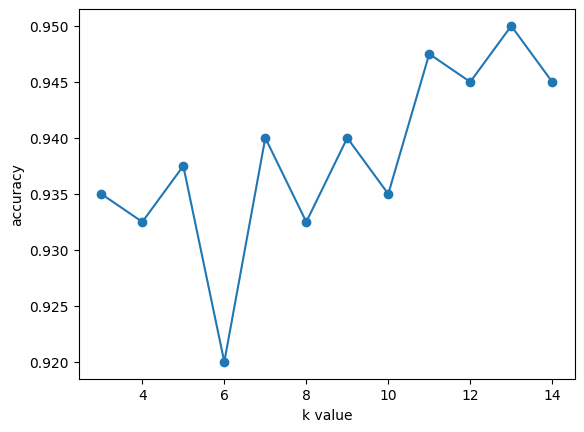

In [33]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,Y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    acc_values.append(acc)
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')    

In [34]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
print("score {}".format(classifier.score(X_train,Y_train)*100))
pred_knn=classifier.predict(X_test)
print(pred_knn)
acr_Knn=accuracy_score(Y_test,pred_knn)*100
print("Accuracy Score {}%".format(acr_Knn))
print("Confusion matrix {}".format(confusion_matrix(Y_test,pred_knn)))
print("{}".format(classification_report(Y_test,pred_knn)))

score 95.0
[3 0 2 0 3 0 2 3 0 1 0 0 0 1 1 2 1 1 2 0 2 1 1 3 3 0 2 1 2 1 3 0 1 3 0 3 1
 1 3 0 0 2 2 0 2 0 1 0 3 1 1 3 3 1 3 3 1 1 2 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 2 1 0 2 2 1 1 1 1 0 3 3 0 2 3 1 3 0 3 3 1 1 0 3 2
 3 1 2 1 3 0 0 0 0 1 3 0 2 1 0 3 3 1 2 1 3 0 1 0 1 3 0 0 2 0 2 0 2 2 0 1 3
 0 0 3 0 3 0 2 0 1 3 2 0 0 3 1 2 0 2 2 2 2 0 2 3 1 1 0 3 2 2 0 2 2 3 1 2 2
 3 2 3 2 0 2 2 2 2 3 3 2 2 0 2 2 2 3 1 0 0 2 3 2 0 1 3 0 2 1 0 0 3 3 0 0 0
 2 2 3 2 0 2 0 3 1 1 1 0 0 3 3 2 2 0 1 1 3 0 0 2 1 1 2 0 0 0 2 3 0 0 0 1 3
 1 1 2 0 0 2 2 1 2 0 3 1 1 1 2 1 3 1 1 3 2 0 1 1 1 3 3 1 1 0 2 2 0 3 3 1 2
 2 2 2 2 3 2 3 1 1 2 2 1 0 0 2 0 2 1 2 1 1 0 0 0 0 2 2 2 3 0 1 2 3 1 2 1 2
 2 1 1 1 3 3 2 3 2 3 0 0 1 1 0 2 0 2 3 0 3 3 2 0 1 1 2 2 1 2 2 1 3 2 0 2 1
 3 1 1 1 1 3 2 1 2 2 1 2 0 2 0 1 1 2 1 1 0 0 3 0 2 2 1 2 0 2]
Accuracy Score 95.0%
Confusion matrix [[103   1   0   0]
 [  3 108   3   0]
 [  0   4  98   3]
 [  0   0   6  71]]
              precision    recall  f1-score   support

       

### 6.Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train,Y_train)
print("score {}".format(nb.score(X_train,Y_train)*100))
pred_nb=nb.predict(X_test)
print(pred_nb)
acr_NB=accuracy_score(Y_test,pred_nb)*100
print("Accuracy Score {}%".format(acr_NB))
print("Confusion matrix {}".format(confusion_matrix(Y_test,pred_nb)))
print("{}".format(classification_report(Y_test,pred_nb)))

score 82.4375
[3 0 1 0 2 0 1 3 0 1 0 0 0 1 1 2 1 1 2 0 2 1 1 3 3 0 2 1 2 1 3 0 1 3 0 3 1
 1 3 1 0 2 1 0 2 0 1 0 2 1 1 3 3 0 3 3 1 1 1 2 0 0 0 1 0 0 1 1 0 1 2 1 0 1
 1 2 1 1 1 1 0 2 2 1 0 0 2 1 0 1 2 1 1 2 2 0 3 3 0 1 3 1 3 0 3 3 2 1 0 3 2
 3 1 2 2 3 0 0 0 0 1 3 0 3 0 0 3 3 1 3 1 3 0 1 0 1 3 0 0 2 0 2 1 2 1 0 1 3
 0 0 3 0 3 0 2 0 2 3 2 0 0 3 1 2 1 2 2 3 2 0 2 3 2 1 0 3 2 2 0 2 2 3 0 3 2
 3 2 2 2 0 2 2 2 2 2 3 2 2 0 2 2 2 3 1 0 0 2 3 2 0 2 3 0 3 1 1 0 3 3 0 0 0
 2 3 3 1 0 2 0 3 1 1 2 0 1 3 3 2 2 0 2 1 3 0 0 2 2 1 2 0 0 0 1 3 0 0 0 2 3
 2 1 2 0 0 2 2 2 2 0 3 1 0 0 2 1 3 1 2 3 2 0 1 1 1 3 3 2 1 0 1 2 0 3 3 1 1
 3 2 2 1 3 2 3 1 1 2 2 0 0 0 2 0 2 1 2 1 2 0 0 0 0 2 3 2 3 1 0 2 2 1 2 1 2
 2 1 2 1 3 3 2 3 2 3 1 0 1 2 0 2 0 2 3 0 3 3 2 0 1 1 3 3 1 2 2 1 3 2 0 2 1
 3 1 1 0 2 3 2 1 2 2 2 3 0 2 0 1 2 2 2 0 0 0 3 0 2 2 1 1 0 2]
Accuracy Score 82.5%
Confusion matrix [[99  5  0  0]
 [ 9 77 28  0]
 [ 0 15 82  8]
 [ 0  0  5 72]]
              precision    recall  f1-score   support

           0       0

### Hyperparameter Tuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [19]:
# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = random, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [37]:
from sklearn.ensemble import RandomForestClassifier

random1=RandomForestClassifier(n_estimators=1000,min_samples_split=5,min_samples_leaf=2,max_features="sqrt",max_depth=20,bootstrap=True)
random1.fit(X_train,Y_train)
print("score {}".format(random1.score(X_train,Y_train)*100))
pred_random1=random1.predict(X_test)
print(pred_random1)
acr_RFT=accuracy_score(Y_test,pred_random1)*100
print("Accuracy Score {}%".format(acr_RFT))
print("Confusion matrix {}".format(confusion_matrix(Y_test,pred_random1)))
print("{}".format(classification_report(Y_test,pred_random1)))

score 100.0
[3 0 2 0 2 0 2 2 0 1 0 0 0 1 1 2 1 1 2 0 2 1 1 3 3 0 2 1 2 1 3 0 1 3 0 3 1
 1 3 1 0 2 1 0 2 0 1 0 3 1 0 3 3 0 3 3 1 1 1 1 0 0 0 1 0 0 1 1 0 1 2 1 0 1
 1 2 1 1 1 1 0 2 1 1 0 0 2 1 0 1 2 1 1 2 1 0 3 3 0 2 3 1 3 0 3 2 2 1 0 3 2
 3 1 2 2 2 0 0 0 0 1 3 0 2 1 0 3 3 0 2 1 3 0 1 0 1 3 0 0 2 0 2 0 2 1 0 1 3
 0 0 3 1 3 0 2 0 1 3 2 0 0 3 1 1 0 2 2 3 2 0 2 3 1 1 0 3 2 2 0 2 2 3 1 3 2
 3 2 2 2 0 3 2 2 2 2 3 2 2 0 2 2 2 3 1 0 0 2 3 2 0 2 3 0 2 1 0 0 3 3 0 0 0
 2 2 3 1 0 2 0 3 1 1 1 0 0 3 3 2 2 0 1 1 3 0 1 2 1 1 2 0 0 0 1 3 0 0 0 1 3
 1 1 2 0 0 2 3 2 2 0 3 1 0 0 2 1 3 1 2 3 2 0 1 1 1 3 3 2 1 0 1 2 0 3 3 1 1
 3 2 2 2 3 2 3 1 1 2 2 0 0 0 2 0 2 1 2 1 1 0 0 0 0 2 2 2 3 0 0 2 3 1 2 0 2
 2 1 1 1 3 3 2 3 2 3 0 0 1 1 0 2 0 2 3 0 3 3 2 0 1 1 2 3 1 2 2 1 3 2 0 2 1
 3 1 0 1 2 3 2 1 2 2 1 3 0 2 0 1 1 2 1 0 0 0 3 0 2 2 1 2 0 2]
Accuracy Score 89.0%
Confusion matrix [[101   3   0   0]
 [ 12  91  11   0]
 [  0  10  92   3]
 [  0   0   5  72]]
              precision    recall  f1-score   support

      

### Evaluate Random Search
<br>
To determine if random search yielded a better model, we compare the base model with the best random search model.

In [26]:
def evaluate(model, X_train,Y_train):
    predictions = model.predict(X_train)
    errors = abs(predictions - Y_train)
    mape = 100 * np.mean(errors / Y_train)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_train, Y_train)

Model Performance
Average Error: 0.0063 degrees.
Accuracy = 99.47%.


In [27]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, Y_train)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


In [40]:
# Comparing the accuracy levels of ecah model

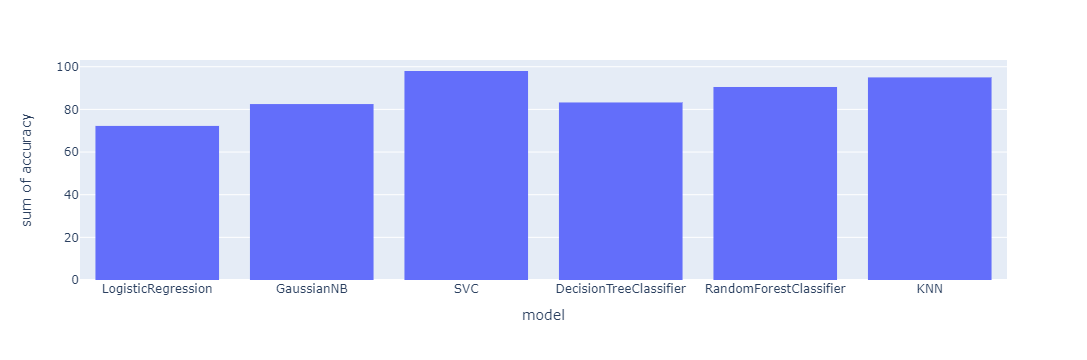

In [45]:
classifires=["LogisticRegression","GaussianNB","SVC","DecisionTreeClassifier","RandomForestClassifier","KNN"]
accuracy_=[acrr,acr_NB,acr_SVM,acr_DT,acr_RF,acr_Knn]
df_ac=pd.DataFrame({'model':classifires,"accuracy":accuracy_})
px.histogram(data_frame=df_ac,x="model",y="accuracy")


### Cross Validation

LogisticRegression: 0.735,0.03559757716474536
GaussianNB: 0.803125,0.04395043372937292
SVC: 0.969375,0.00812499999999997
DecisionTreeClassifier: 0.8168749999999999,0.024052351756117307
RandomForestClassifier: 0.8768749999999998,0.03973053768828203
KNN: 0.91375,0.015761900266148106


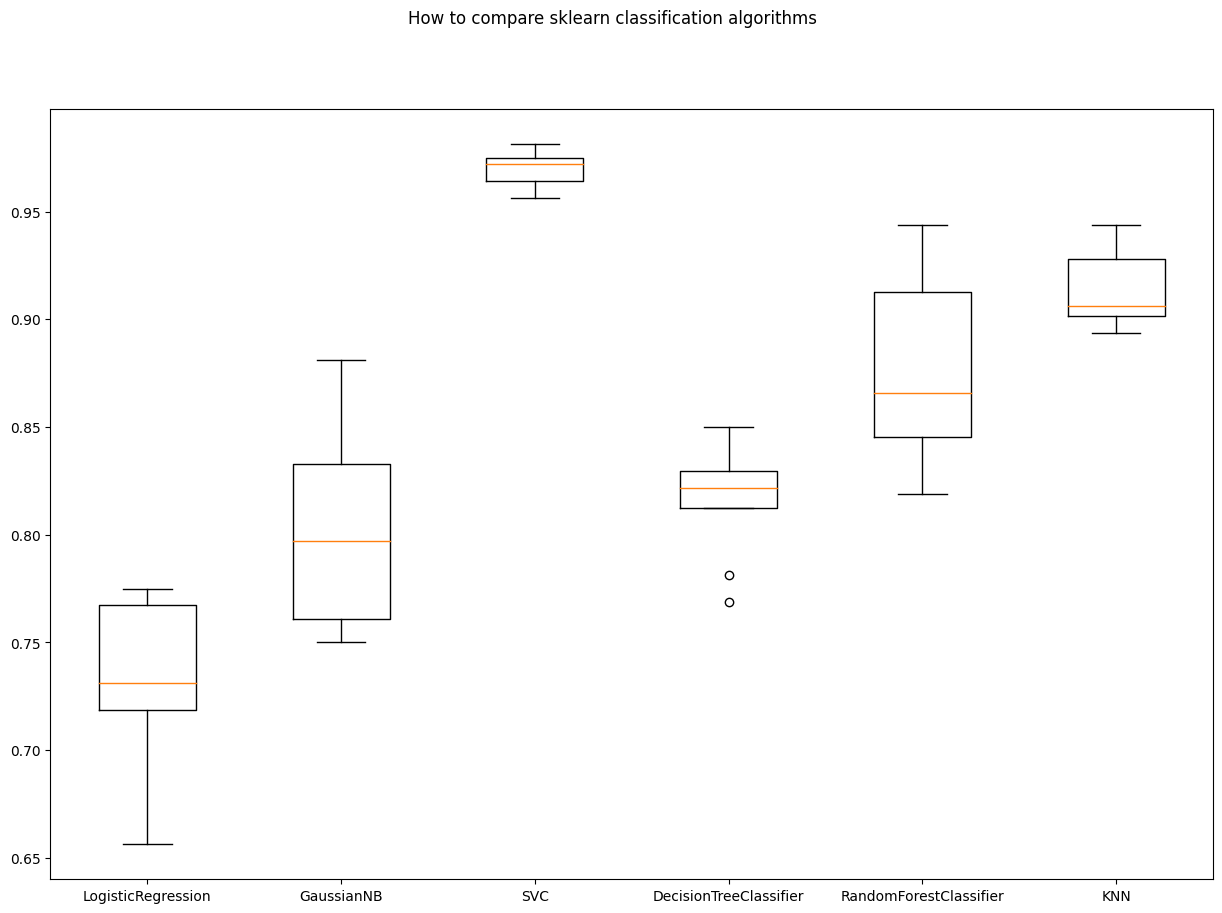

In [54]:
from sklearn.model_selection import KFold,cross_val_score
models=[LogisticRegression(max_iter=5000),GaussianNB(),SVC(kernel='linear'),DecisionTreeClassifier(criterion="entropy"),RandomForestClassifier(n_estimators=1000),KNeighborsClassifier()]
results=[]
for model,name in zip(models,classifires):
    kfold=KFold(n_splits=10,random_state=50,shuffle=True)
    cv_result=cross_val_score(model,X_train,Y_train,cv=kfold,scoring="accuracy")
    results.append(cv_result)
    print("{}: {},{}".format(name,cv_result.mean(), cv_result.std()))

fig = plt.figure(figsize=(15,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(classifires)
plt.show()


### Reading Test data

In [9]:
test_data = pd.read_csv(r'D:\Devi\TCS\MobileDataSets\MobileDataSets\MobileTest.csv')
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


### Preprocessing on Test data

In [14]:
print("Shape of the data:",test_data.shape)
test_data.info()

Shape of the data: (1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non

<AxesSubplot:>

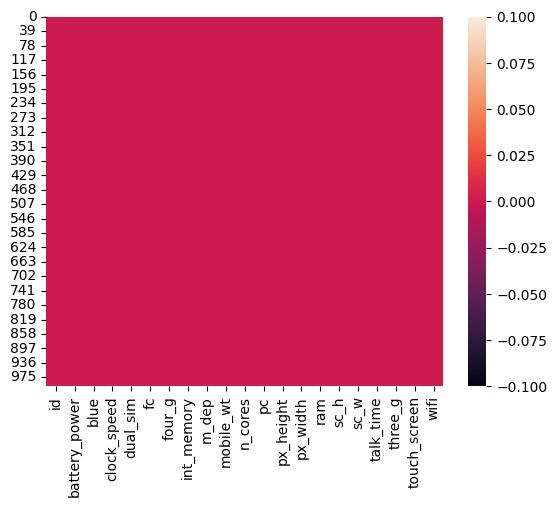

In [16]:
# checking for null values 

sns.heatmap(test_data.isna())

There is no null values 

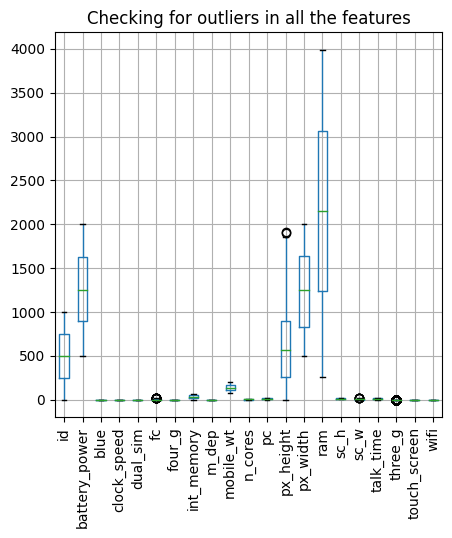

In [17]:
# checking for outliers


freqgraph = test_data.select_dtypes(include=['int64','float64'])
freqgraph.boxplot(figsize=(5,5))
plt.title("Checking for outliers in all the features")
plt.xticks(rotation=90)
plt.show()

No outliers in the dataset

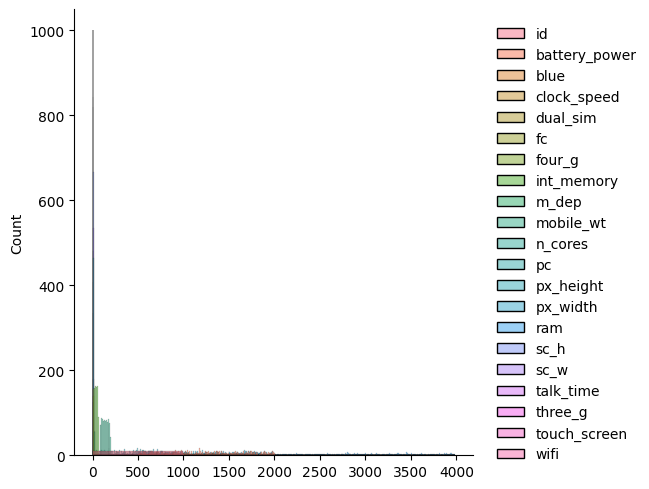

In [18]:
# scaling


standard = StandardScaler()
standard.fit(test_data)
sns.displot(test_data)

### Predicting the price catagory of the phone
<br>
price_range:<br> 0--low cost <br>1--medium cost<br> 2--high cost <br> 3--very high cost.

In [23]:
test_data.drop('id',axis=1,inplace=True)
prediction = svm.predict(test_data)


In [27]:
price_range = pd.DataFrame(prediction)
test_data['Price_range'] = price_range

In [28]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
